# SVM - Support Vector Machine


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import csv

In [2]:
style.use('ggplot')

In [3]:
#sepal:sp, petal:pl, length:l, breadth:b, class = Iris Setosa, Iris Versicolour, Iris Virginica

(sp_l, sp_b, pl_l, pl_b, c) = ([],[],[],[],[])
with open('iris_data.txt', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    for line in csv_reader:
        sp_l.append(float(line[0]))
        sp_b.append(float(line[1]))
        pl_l.append(float(line[2]))
        pl_b.append(float(line[3]))
        c.append(line[4])
sp_l = np.array(sp_l)
sp_b = np.array(sp_b)
pl_l = np.array(pl_l)
pl_b = np.array(pl_b)

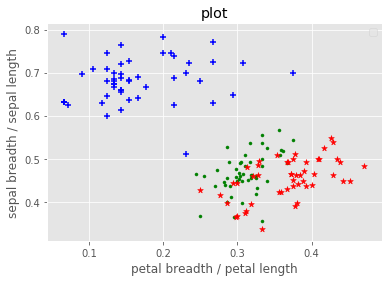

In [4]:
#plt.scatter(sp_l, sp_b, label = 'plot', color = 'blue', marker = '+')
#print c
for i in range(len(c)):
    if (str(c[i]) == 'Iris-setosa'):
        plt.scatter(pl_b[i]/pl_l[i], sp_b[i]/sp_l[i], color = 'blue', marker = '+')
    elif (str(c[i]) == 'Iris-versicolor'):
        plt.scatter(pl_b[i]/pl_l[i], sp_b[i]/sp_l[i], color = 'green', marker = '.')
    elif (str(c[i]) == 'Iris-virginica'):
        plt.scatter(pl_b[i]/pl_l[i], sp_b[i]/sp_l[i], color = 'red', marker = '*')
plt.xlabel('petal breadth / petal length')
plt.ylabel('sepal breadth / sepal length')
plt.title('plot')
plt.legend()
plt.show()

In [5]:
class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    #training the data set
    def fit(self, data):
        self.data = data
        #{|w|:[w,b]}
        opt_dict = {}
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]
        
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value * 0.1,
                     self.max_feature_value * 0.01,
                     self.max_feature_value * 0.001]
        #expensive
        b_range_multiple = 5
        #not taking small of steps
        #with b as we do with w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                  self.max_feature_value*b_range_multiple, 
                                  step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        #weakest link in the SVM fundamentally
                        #SMO attempts to fix this a bit
                        # yi(xi.w+b)>=1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b)>=1:
                                    found_option = False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                if w[0] < 0:
                    optimized = True
                    print ('Optimized a step')
                else:
                    w = w - step
            
            norms = sorted([n for n in opt_dict])
#             print opt_dict
#             print norms
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
        
    
    def predict(self, features):
        # sign(x.w+b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], marker='*', c=self.colors[classification])
        return classification 
    
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        #for (w.x+b) = 1
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],'k')
        
        #for (w.x+b) = -1
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],'k')
        
        #for (w.x+b) = 0
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--')
        
        plt.show()
        
    

In [6]:
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8]]),
              1:np.array([[5,1],
                          [6,-1],
                          [7,3]])}
print data_dict


{1: array([[ 5,  1],
       [ 6, -1],
       [ 7,  3]]), -1: array([[1, 7],
       [2, 8],
       [3, 8]])}


Optimized a step
Optimized a step
Optimized a step


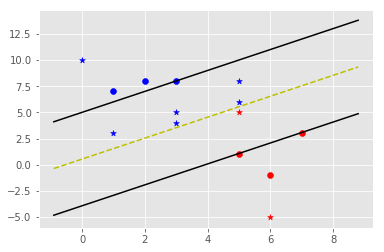

In [7]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],[1,3],[3,4],[3,5],[5,5],[5,6],[6,-5],[5,8]]
for p in predict_us:
    svm.predict(p)

svm.visualize()

In [8]:
svm.predict([5,20])

-1.0

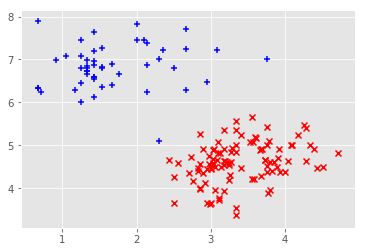

{1: array([[4.16666667, 5.23809524],
       [3.33333333, 5.55555556],
       [2.9787234 , 4.57142857],
       [2.5       , 4.26229508],
       [3.92857143, 4.375     ],
       [3.7254902 , 4.65517241],
       [3.52941176, 5.08474576],
       [3.89830508, 4.70588235],
       [2.85714286, 4.56140351],
       [3.27272727, 4.61538462],
       [3.92857143, 4.375     ],
       [3.0952381 , 5.0877193 ],
       [3.75      , 5.42372881],
       [4.28571429, 5.3968254 ],
       [2.85714286, 4.        ],
       [3.55932203, 4.22535211],
       [3.28358209, 4.93506494],
       [2.82608696, 4.39393939],
       [2.98507463, 3.63636364],
       [3.75      , 5.42372881]]), -1: array([[1.53846154, 6.80851064],
       [1.25      , 7.08333333],
       [1.42857143, 6.6       ],
       [1.42857143, 7.63636364],
       [2.10526316, 7.45098039],
       [1.66666667, 6.89655172],
       [3.75      , 7.        ],
       [2.10526316, 7.45098039],
       [0.90909091, 6.97674419],
       [1.17647059, 6.2962963 ],


In [9]:
import random
(c1,c2) = ([],[])
(cn1,cn2) = ([],[])
for i in range(len(c)):
    if (str(c[i]) == 'Iris-setosa'):
        c1.append([pl_b[i]/pl_l[i]*10, sp_b[i]/sp_l[i]*10])
        plt.scatter(pl_b[i]/pl_l[i]*10, sp_b[i]/sp_l[i]*10, color = 'blue', marker = '+')
    else:
        c2.append([pl_b[i]/pl_l[i]*10, sp_b[i]/sp_l[i]*10])
        plt.scatter(pl_b[i]/pl_l[i]*10, sp_b[i]/sp_l[i]*10, color = 'red', marker = 'x')
plt.show()        
#print c1
# print len(c1)
# print len(c2)
for i in range(20):
    cn1.append(c1[random.randint(0,49)])
    cn2.append(c2[random.randint(0,99)])

data_dict = {-1:np.array(cn1),1:np.array(cn2)}
print data_dict
print len(cn1)
print len(cn2)


In [ ]:
svm1 = Support_Vector_Machine()
svm1.fit(data=data_dict)

predict_us = [[3, 3],[1,10],[3,2],[3,3],[5,5],[5,6],[6,8],[5,8]]
for p in predict_us:
    svm1.predict(p)

svm1.visualize()

Optimized a step
